In [1]:
import csv
import pandas_datareader as web
import yfinance as yf
import sys 
#import quandl
import numpy as np
from sklearn .linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import datetime
import pandas_datareader as web
import yahoofinance
import pandas 
import os

In [2]:
data = pandas.read_csv('dataset.csv',sep =";", error_bad_lines=False)
"""Pour dataset.csv avec la liste du cac40"""
#pandas.DataFrame(data).get('sector')
"""Visualisation des données"""
pandas.DataFrame(data)

,symbol,shortName,address1,address2,city,state,zip,country,phone,fax,website,industry,sector,fullTimeEmployees,maxAge
0,AIR.PA,NaN,Mendelweg 30,NaN,Leiden,NaN,2333 CS,Netherlands,31 71 524 5600,NaN,http://www.airbus.com,Aerospace & Defense,Industrials,131349.0,86400
1,MT.AS,NaN,"24-26, Boulevard dâAvranches",NaN,Luxembourg City,NaN,1160,Luxembourg,352 4792 1,352 4792 2235,http://corporate.arcelormittal.com,Steel,Basic Materials,168000.0,86400
2,CS.PA,NaN,"25, avenue Matignon",NaN,Paris,NaN,75008,France,33 1 40 75 57 00,NaN,http://www.axa.com,Insurance—Diversified,Financial Services,110278.0,86400
3,BNP.PA,NaN,16 boulevard des Italiens,NaN,Paris,NaN,75009,France,33 1 40 14 45 46,NaN,http://group.bnpparibas,Banks—Regional,Financial Services,193319.0,86400
4,ALO.PA,NaN,"48, rue Albert Dhalenne",NaN,St Ouen,NaN,93400,France,33 1 57 06 90 00,33 1 57 06 96 66,http://www.alstom.com,Specialty Industrial Machinery,Industrials,38900.0,86400
5,CA.PA,NaN,"26, Quai Michelet",NaN,Levallois-Perret,NaN,92695,France,33 1 55 63 39 00,33 1 55 63 39 01,http://www.carrefour.com,Grocery Stores,Consumer Defensive,NaN,86400
6,HO.PA,NaN,Tour Carpe Diem,Place des Corolles Esplanade Nord,Courbevoie,NaN,92400,France,33 1 57 77 80 00,NaN,http://www.thalesgroup.com/en,Aerospace & Defense,Industrials,80702.0,86400
7,DSY.PA,NaN,"10, Rue Marcel Dassault",NaN,VÃ©lizy-Villacoublay,NaN,78140,France,33 1 61 62 61 62,33 1 70 73 43 63,http://www.3ds.com,Software—Application,Technology,19789.0,86400
8,OR.PA,NaN,"41, rue Martre",NaN,Clichy,NaN,92117,France,33 1 47 56 70 00,NaN,http://www.loreal.com,Household & Personal Products,Consumer Defensive,85392.0,86400
9,VIV.PA,NaN,42 avenue de Friedland,Cedex 08,Paris,NaN,75380,France,33 1 71 71 10 00,NaN,http://www.vivendi.com,Broadcasting,Communication Services,42800.0,86400


In [3]:
#Symboles du cac40 
CAC40= ['AI.PA','AIR.PA','ALO.PA','MT.AS','CS.PA','BNP.PA','EN.PA', 'CAP.PA' ,'CA.PA','ACA.PA','BN.PA','DSY.PA','ENGI.PA','EL.PA','RMS.PA','KER.PA','OR.PA','LR.PA','MC.PA','ML.PA','ORA.PA','RI.PA','PUB.PA','RNO.PA','SAF.PA','SGO.PA','SAN.PA','SU.PA','GLE.PA','STLA.PA','STM.PA','TEP.PA','HO.PA','FP.PA','URW.PA','VIE.PA','DG.PA','VIV.PA','WLN.PA']


"""with open('cac40.csv','w', newline = '') as nfile:
    writer = csv.writer(nfile)
    for c in CAC40:
        writer.writerow([c])
"""
#help(datetime)

"with open('cac40.csv','w', newline = '') as nfile:\n    writer = csv.writer(nfile)\n    for c in CAC40:\n        writer.writerow([c])\n"

In [4]:

start = datetime.datetime(2018,3,20) #année/ mois / jour
end = datetime.datetime(2021,3,30)
#for i, c in enumerate(CAC40):
df = web.DataReader(CAC40[5],'yahoo',start, end)

print(CAC40[5])
#help(yahoofinance.BalanceSheet)
print(type(df))

df = pandas.DataFrame(df)
df.index #index contient les dates des stocks


BNP.PA
<class 'pandas.core.frame.DataFrame'>


DatetimeIndex(['2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-04-03', '2018-04-04',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-29', '2021-03-30'],
              dtype='datetime64[ns]', name='Date', length=775, freq=None)

In [10]:
print(df[['Adj Close']])
#X= np.array(df.drop(['Adj Close'],1))
def pente(df):
    """ fonction qui calcule la pente des données de fermetures entre deux jours 
    @Entrée: df dataFrame (n)
    @Sortie: date et Y tableau des pentes (n-1 valeurs)"""
    
    X = df.loc[:,'Adj Close'].values #slection des adjusted fermeture stocks
    date = df.index   #dates
    N = len(X)   
    T = np.arange(0,N) 
    Y= np.zeros(N-1)
    for i in range(N-1):
        Y[i] =(X[i+1]-X[i])/(T[i+1]-T[i])
    #print(T,Y)
    return date[:-1],Y
date,X= pente(df)
todel = np.argmax(X)    #on enlève la valeur maximale , sa augmente le score, à voir
X= np.delete(X,todel)
date= np.delete(date, todel)


"""todel = np.argmin(X)
X= np.delete(X,todel) #ca marche pas, baisse le score
date= np.delete(date, todel)"""

def norm(X):
    """Calcule les valeurs normalisées """
    n = 0
    for x in X:
        n+=x**2
    n= np.sqrt(n)
    return X/n

X = norm(X)
Y = [] #valeurs classifiées, (au dessus de 0 c'est 1 , au-dessous c'est 0)

for x in X:
    if x >=0:
        Y.append('1')
    else:
        Y.append('0')
X=np.array([[i,X[i]] for i in range(len(X))])
print("X classé: ",X[:,1],Y)

            Adj Close
Date                 
2018-03-20  48.429794
2018-03-21  48.138905
2018-03-22  47.258366
2018-03-23  46.574375
2018-03-26  46.291344
...               ...
2021-03-24  51.119999
2021-03-25  50.830002
2021-03-26  51.669998
2021-03-29  50.669998
2021-03-30  52.619999

[775 rows x 1 columns]
X classé:  [-0.01317697 -0.03988738 -0.03098397 -0.01282099  0.02314864  0.01745103
  0.00534198 -0.01709454 -0.00890359  0.05911913 -0.01887543  0.01032799
  0.01602629 -0.01388942  0.01104028  0.00783516  0.00320529  0.01388942
  0.01104028  0.01246468  0.02208073  0.02457356  0.00356126 -0.017807
 -0.00925939  0.01175239  0.01460188  0.01317697 -0.03383294 -0.0259983
 -0.01068413 -0.01460171  0.02457373  0.00356126  0.00071211  0.00391775
  0.0110401  -0.03276469 -0.00320512 -0.02136827  0.00178072  0.03810667
 -0.03240854 -0.01958772 -0.02492953 -0.02314916 -0.09508877  0.00150389
 -0.04436605  0.03120654  0.00751962 -0.03647024  0.02143082  0.01579145
 -0.01541543  0.03684643 

773


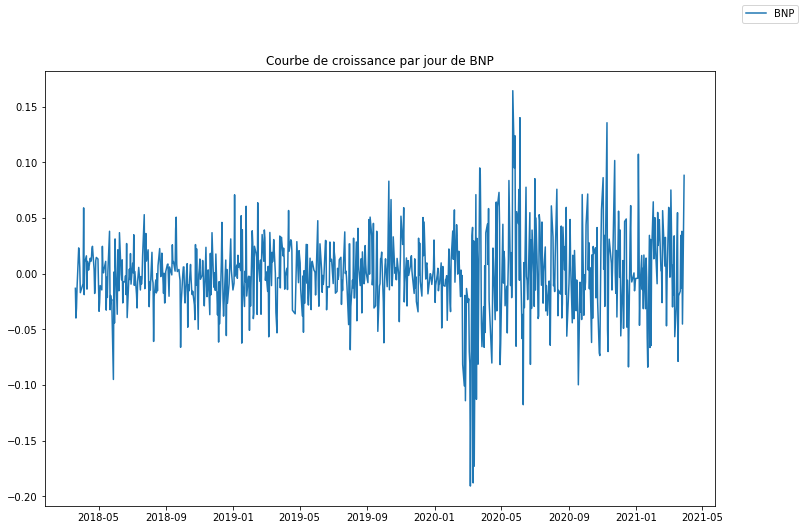

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
fig ,ax = plt.subplots(1,1, figsize =(12,8))
ax.plot(date,X[:,1], label='BNP')
ax.set_title("Courbe de croissance par jour de BNP")
fig.legend()
plt.figure()
print(len(X))

In [11]:

from sklearn.naive_bayes import BernoulliNB
#Model de classification de croissance avec SVC 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3)
model = svm.SVC(kernel = 'rbf' ,decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
a = metrics.accuracy_score(y_test,y_pred)
p = metrics.precision_score(y_test,y_pred,pos_label=str(1),average="macro")
r = metrics.recall_score(y_test, y_pred,pos_label=str(1),average="macro")
print("Précision du model: ", a)
print("Précision du model: ", p)
print("Précision du model: ", r)


Précision du model:  0.4956896551724138
Précision du model:  0.51321044546851
Précision du model:  0.5031965506987809


/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [8]:

forecast_out = 30 #nb jours

df=df[['Adj Close']]

df['Prediction']= df.shift(-forecast_out)
df

,Adj Close,Prediction
Date,,
2018-03-20,48.429794,49.271030
2018-03-21,48.138905,49.035172
2018-03-22,47.258366,48.712830
2018-03-23,46.574375,49.255310
2018-03-26,46.291344,49.333927
...,...,...
2021-03-24,51.119999,NaN
2021-03-25,50.830002,NaN
2021-03-26,51.669998,NaN


In [13]:
forecast_out = 30 #nb jours
#ajout de colonnes (y= prediction )
df['Prediction']= df[['Adj Close']].shift(-forecast_out)
print(df.tail())

            Adj Close  Prediction
Date                             
2021-03-24  51.119999         NaN
2021-03-25  50.830002         NaN
2021-03-26  51.669998         NaN
2021-03-29  50.669998         NaN
2021-03-30  52.619999         NaN


In [14]:
X = np.array(df.drop(['Prediction'],1))
X = X[:-forecast_out]
y = np.array(df['Prediction'])
y = y[:-forecast_out]
print(X,'\n',y)

[[48.42979431]
 [48.13890457]
 [47.25836563]
 [46.57437515]
 [46.29134369]
 [46.80236435]
 [47.18760681]
 [47.30553436]
 [46.92816162]
 [46.73160934]
 [48.0367012 ]
 [47.62001419]
 [47.84801102]
 [48.2018013 ]
 [47.89518356]
 [48.13890457]
 [48.31187057]
 [48.38262939]
 [48.68924713]
 [48.93296814]
 [49.2081337 ]
 [49.69557953]
 [50.23805618]
 [50.31667328]
 [49.92357254]
 [49.7191658 ]
 [49.97860718]
 [50.30095291]
 [50.59184265]
 [49.84495926]
 [49.27103043]
 [49.03517151]
 [48.71282959]
 [49.25531006]
 [49.33392715]
 [49.34964752]
 [49.43613434]
 [49.67985153]
 [48.9565506 ]
 [48.88579559]
 [48.41407776]
 [48.45338821]
 [49.2946167 ]
 [48.57917786]
 [48.14676666]
 [47.59643173]
 [47.08539963]
 [44.98625565]
 [45.01945496]
 [44.04004669]
 [44.7289505 ]
 [44.89495087]
 [44.08984756]
 [44.56294632]
 [44.91155243]
 [44.5712471 ]
 [45.384655  ]
 [45.36804962]
 [45.24354935]
 [45.51745605]
 [44.93644714]
 [44.77875137]
 [44.61274719]
 [44.5712471 ]
 [44.15625   ]
 [44.75384521]
 [43.88234

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .8)
#help(SVR)

In [16]:
#model de regression test
svr_rbf = SVR(kernel ='rbf', C =1e3, gamma = .20)
C = np.exp(1*np.arange(-5,15))
for c in C:
    svr_rbf = SVR(kernel ='rbf', C =c, gamma = 20)
    svr_rbf.fit(x_train, y_train)
    svm_confidence = svr_rbf.score(x_test, y_test)
    print(f"score pour c = {c} svm: {svm_confidence}")
sve_rbf = SVR(kernel ='rbf', C =7.31, gamma = .20)

score pour c = 0.006737946999085467 svm: -0.007787852985971178
score pour c = 0.01831563888873418 svm: -0.005180470668388448
score pour c = 0.049787068367863944 svm: 0.004746634762196389
score pour c = 0.1353352832366127 svm: 0.020593604827216838
score pour c = 0.36787944117144233 svm: 0.06455811884518226
score pour c = 1.0 svm: 0.14186381599929665
score pour c = 2.718281828459045 svm: 0.20403458705997946
score pour c = 7.38905609893065 svm: 0.1875668338408788
score pour c = 20.085536923187668 svm: 0.11274208809096353
score pour c = 54.598150033144236 svm: -0.07142507832257539
score pour c = 148.4131591025766 svm: -0.21552269392389878
score pour c = 403.4287934927351 svm: -0.674499370933588
score pour c = 1096.6331584284585 svm: -2.6900414323637807
score pour c = 2980.9579870417283 svm: -12.229390857252643
score pour c = 8103.083927575384 svm: -33.95482298765285
score pour c = 22026.465794806718 svm: -46.76965881707296
score pour c = 59874.14171519782 svm: -68.98459286244092
score pour

In [17]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("score svm: ", svm_confidence) #horrible

score svm:  -206.54343724239368
